In [1]:
from location import mount_image

mount_image()

14.0
Command 'ideviceimagemounter /Users/bytedance/Desktop/workspace/notebook/BusSync/14.0/DeveloperDiskImage.dmg /Users/bytedance/Desktop/workspace/notebook/BusSync/14.0/DeveloperDiskImage.dmg.signature' returned non-zero exit status 255.


False

In [2]:
import matplotlib.pyplot as plt
from IPython.display import clear_output
import numpy as np
import random
import math
import os
from rebuild import get_edge_point, rebuild_line
from move_controller import Move
from location import set_location

class Line(object):
    def __init__(self, line_id, gap=200):
        self.LINE_ID = line_id
        self.GAP = gap
        self.FILE = open("data/{line_id}.csv".format(line_id=self.LINE_ID))
        self.DIVER = dict()

        self.xs = list()
        self.ys = list()

        for line in self.FILE.readlines():
            x, y = line.strip().split(',')
            self.xs.append(float(x))
            self.ys.append(float(y))
            self.DIVER[line] = True

    def build_line(self):
        sx, sy = get_edge_point(self.DIVER)
        self.LINE_X, self.LINE_Y = rebuild_line(sx, sy, self.DIVER, self.GAP)
        return sx, sy

    def display(self, line=True, point=True, now=None, size=(15, 10)):
        plt.figure(figsize=size)
        if point:
            plt.scatter(self.xs, self.ys, s=1)
        if line:
            for i in range(len(self.LINE_X)): 
                plt.plot(self.LINE_X[i], self.LINE_Y[i])
        if now is not None:
            plt.scatter([now[0]], [now[1]], s=20, c='r')
        plt.show()
    
    def run(self):
        self.build_line()
        sx = None
        sy = None

        for i in range(len(self.LINE_X)):
            move = Move(self.LINE_X[i], self.LINE_Y[i], step=0.0002)
            set_location("39.9780507880051 116.3377331635742") # set to home
            while not move.move_end():
                resp = move.do_move()
                if random.randint(0, 15) == 0:
                    clear_output(wait=True)
                    print("Line {line_id}, current spd {spd} km/h, progress {prog}".format(
                        line_id=self.LINE_ID,
                        spd=round(move.speed(), 2),
                        prog=move.progress()))
                    self.display(point=False, now=(sy, sx))
                if resp is None:
                    continue
                sx, sy = resp

In [ ]:
line = Line(3900, 200)
sx, sy = line.build_line()
line.display(now=(sx, sy))

Line 3928, current spd 112.23 km/h, progress 727 / 734


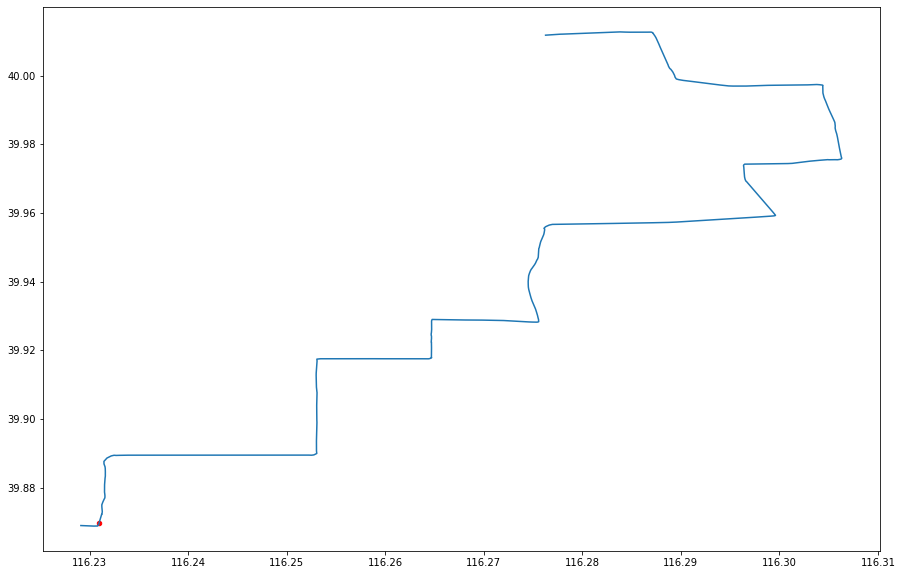

Device location set to 39.86839206385442 116.22489255931067.
Device location set to 39.868367092166416 116.22488987842756.
Device location set to 39.86817335622786 116.22488518245835.
Device location set to 39.867980245812674 116.22483300607178.
Device location set to 39.86790180596136 116.22481181242578.
Device location set to 39.86770507225306 116.22477571594831.
Device location set to 39.86766747445597 116.22476881754095.
Device location set to 39.86765150126339 116.224569202488.
Device location set to 39.86763692557439 116.22438706547442.
Device location set to 39.867660332746524 116.22418820612607.
Device location set to 39.86768373853695 116.22398934493579.
Device location set to 39.86770714294792 116.22379048190655.
Device location set to 39.86773054598175 116.22359161704135.
Device location set to 39.86775394764075 116.22339275034325.
Device location set to 39.867777347927266 116.22319388181529.
Device location set to 39.86779310029427 116.22306000193298.


In [3]:
workids = [
    (784, 200),
    (3413, 200),
    (974, 200),
    (3349, 200),
    (3980, 250),
    (381, 250),
    (197, 200),
    (1065, 200),
    (1064, 200),
    (2029, 200),
    (3451, 200),
    (936, 250),
    (659, 250),
    (1468, 200),
    (3928, 300),
]
workline = [Line(line_id, gap=gap) for line_id, gap in workids]

for line in workline:
    line.run()
    os.system('mv data/{line_id}.csv data/finished/_{line_id}.csv'.format(
        line_id=line.LINE_ID))